In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import expon, kstest
import numpy as np

ModuleNotFoundError: No module named 'plotly'

In [58]:
df = pd.read_csv('..\data\data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_18472\1175757797.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\data.csv')


In [59]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], dayfirst=True, errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_18472\373589552.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], dayfirst=True, errors='coerce')


# Feature Engineering

In [60]:
CLV_bins = [0,2000, 4000, 6000, 8000, 10000, 20000, 30000, 50000,90000]
value_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]

income_bins = [ -1,15000, 30000, 45000, 60000, 75000, 100000]
income_labels = [0,1,2,3,4,5]

premium_bins = [60, 70, 80, 100, 150, 200, 250, 300]
premium_labels = [0,1,2,3,4,5,6]

claim_bins = [0, 150, 300, 450, 600, 750, 1000, 1200, 1400, 1800, 3000]
claim_labels = [0,1,2,3,4,5,6,7,8,9]

# Apply binning to the respective variables
df['CLV Category'] = pd.cut(df['Customer Lifetime Value'], bins=CLV_bins, labels=value_labels)
df['Income Category'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)
df['Monthly Premium Category'] = pd.cut(df['Monthly Premium Auto'], bins=premium_bins, labels=premium_labels)
df['Total Claim Amount Category'] = pd.cut(df['Total Claim Amount'], bins=claim_bins, labels=claim_labels)


In [61]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Category,Income Category,Monthly Premium Category,Total Claim Amount Category
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,1,3,0,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,3,0,2,6
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,5,3,3,3
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,3,0,3,3
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-03-02,Employed,M,43836,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1,2,1,0


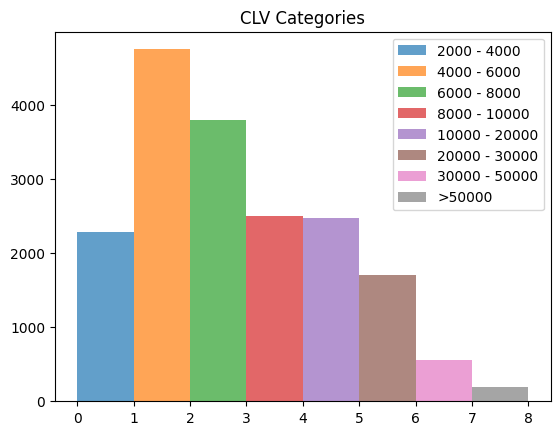

In [62]:
label_clv = ['2000 - 4000', '4000 - 6000', '6000 - 8000', '8000 - 10000', '10000 - 20000', '20000 - 30000', '30000 - 50000', '>50000']
value_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]
CLV_bins = [0,2000, 4000, 6000, 8000, 10000, 20000, 30000, 50000,90000]
for i in range(len(value_labels)-1):
    plt.hist(df['CLV Category'], bins=value_labels[i:i+2], alpha=0.7, label=label_clv[i])
plt.legend()
plt.title("CLV Categories");


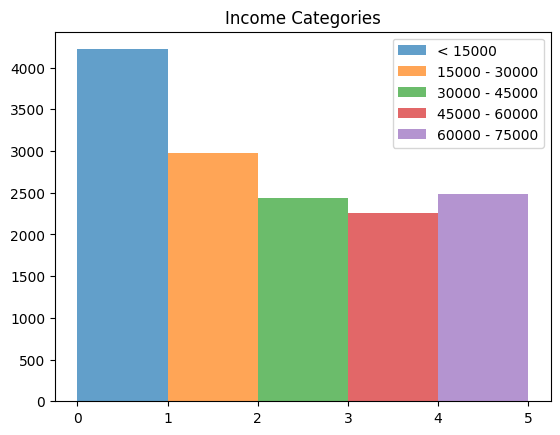

In [63]:
income_labels = [0,1,2,3,4,5]
income_bins = [ -1,15000, 30000, 45000, 60000, 75000, 100000]
labels_income = ['< 15000', '15000 - 30000', '30000 - 45000', '45000 - 60000', '60000 - 75000', '75000 - 100000']
for i in range(len(income_labels)-1):
    plt.hist(df['Income Category'], bins=income_labels[i:i+2], alpha=0.7, label=labels_income[i])
plt.legend()
plt.title("Income Categories");

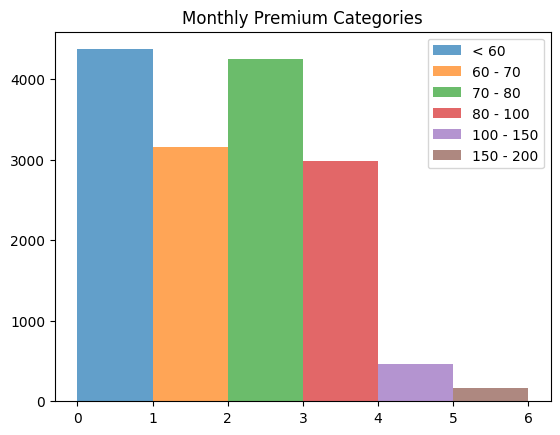

In [64]:
premium_bins = [60, 70, 80, 100, 150, 200, 250, 300]
premium_labels = [0,1,2,3,4,5,6]
labels_premium = ['< 60', '60 - 70', '70 - 80', '80 - 100', '100 - 150', '150 - 200', '200 - 250', '250 - 300']
for i in range(len(premium_labels)-1):
    plt.hist(df['Monthly Premium Category'], bins=premium_labels[i:i+2], alpha=0.7, label=labels_premium[i])
plt.legend()
plt.title("Monthly Premium Categories");

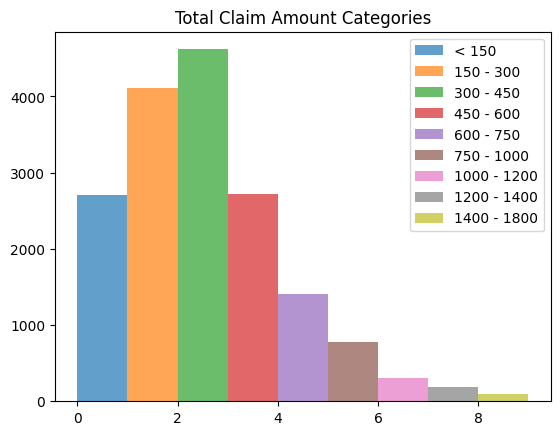

In [65]:
claim_bins = [0, 150, 300, 450, 600, 750, 1000, 1200, 1400, 1800, 3000]
claim_labels = [0,1,2,3,4,5,6,7,8,9]
labels_claim = ['< 150', '150 - 300', '300 - 450', '450 - 600', '600 - 750', '750 - 1000','1000 - 1200', '1200 - 1400', '1400 - 1800', '> 1800']
for i in range(len(claim_labels)-1):
    plt.hist(df['Total Claim Amount Category'], bins=claim_labels[i:i+2], alpha=0.7, label=labels_claim[i])
plt.legend()
plt.title("Total Claim Amount Categories");

### Encoding the Categorical Variables

In [66]:
df_categorical = df.select_dtypes(include=['object'])
df_numerical =  df.select_dtypes(include=['number'])

In [67]:
df_categorical_new = df_categorical.drop('Customer', axis=1)

In [68]:
df_temp = df[['CLV Category', 'Income Category','Monthly Premium Category','Total Claim Amount Category']]
df_temp.head()

,CLV Category,Income Category,Monthly Premium Category,Total Claim Amount Category
0,1,3,0,2
1,3,0,2,6
2,5,3,3,3
3,3,0,3,3
4,1,2,1,0


In [69]:
df_new = pd.concat([df_categorical_new, df_temp], axis = 1)

In [70]:
df_new.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,CLV Category,Income Category,Monthly Premium Category,Total Claim Amount Category
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,1,3,0,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,3,0,2,6
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,5,3,3,3
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,3,0,3,3
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,1,2,1,0


In [71]:
categorical = df_new.columns.to_list()
categorical

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'CLV Category',
 'Income Category',
 'Monthly Premium Category',
 'Total Claim Amount Category']

In [72]:
df_encoded = pd.get_dummies(df_new, columns=categorical)
df_encoded.head()

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Total Claim Amount Category_0,Total Claim Amount Category_1,Total Claim Amount Category_2,Total Claim Amount Category_3,Total Claim Amount Category_4,Total Claim Amount Category_5,Total Claim Amount Category_6,Total Claim Amount Category_7,Total Claim Amount Category_8,Total Claim Amount Category_9
0,False,False,False,False,True,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,True,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,True,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,False,True,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,True,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


C:\Users\HP\AppData\Local\Temp\ipykernel_18472\1959856631.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Total Claim Amount Category')


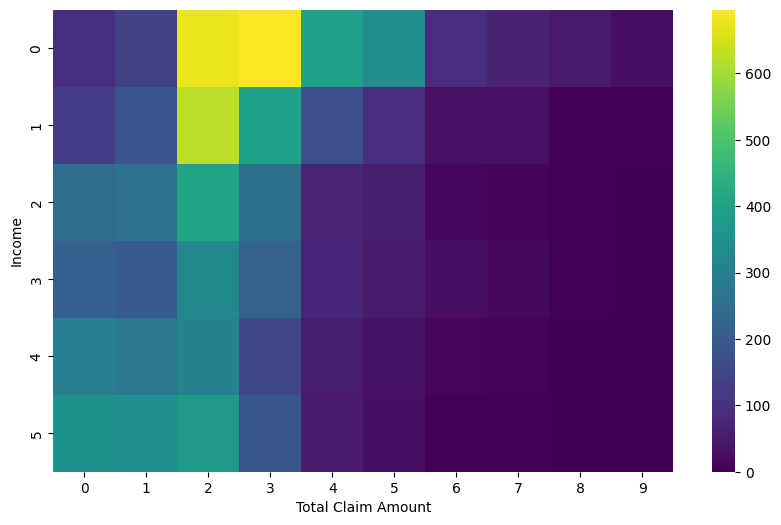

In [73]:

plt.subplots(figsize=(10, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Income Category'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Income')

C:\Users\HP\AppData\Local\Temp\ipykernel_18472\3421201945.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Total Claim Amount Category')


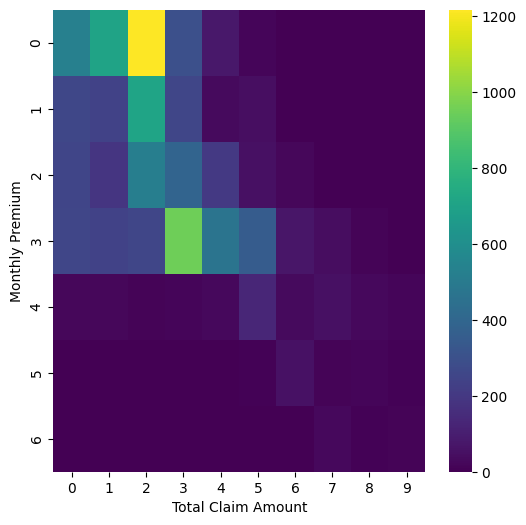

In [74]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Monthly Premium Category'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Monthly Premium')

C:\Users\HP\AppData\Local\Temp\ipykernel_18472\1184555359.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Total Claim Amount Category')


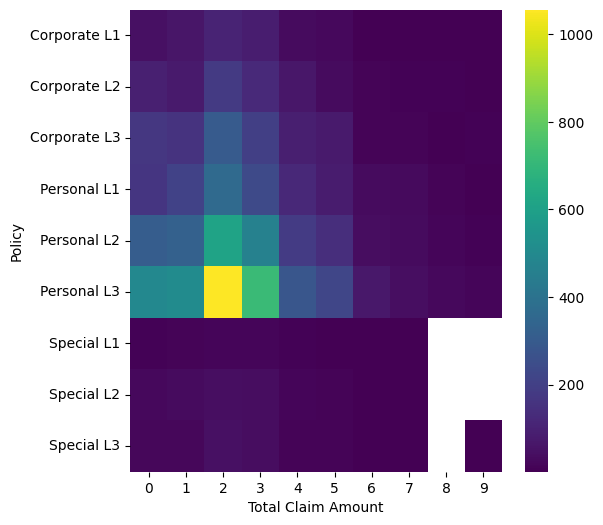

In [75]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Policy')

C:\Users\HP\AppData\Local\Temp\ipykernel_18472\3576776054.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Total Claim Amount Category')


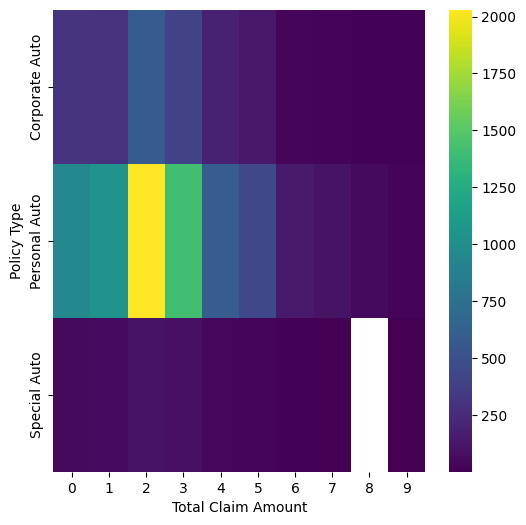

In [76]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy Type'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Policy Type')

C:\Users\HP\AppData\Local\Temp\ipykernel_18472\3535530179.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Monthly Premium Category')


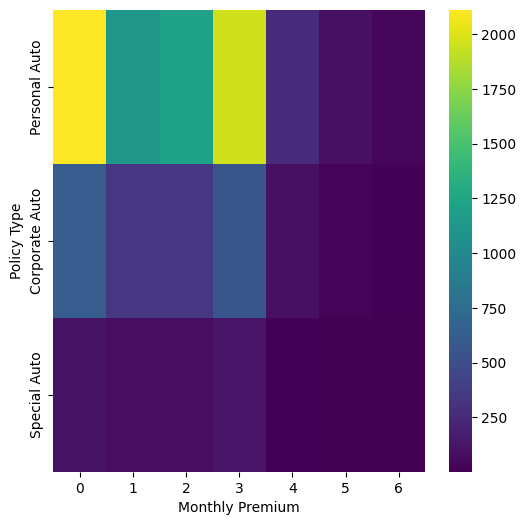

In [77]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy Type'].value_counts()
    for x_label, grp in df_new.groupby('Monthly Premium Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly Premium')
_ = plt.ylabel('Policy Type')

C:\Users\HP\AppData\Local\Temp\ipykernel_18472\3918625317.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Monthly Premium Category')


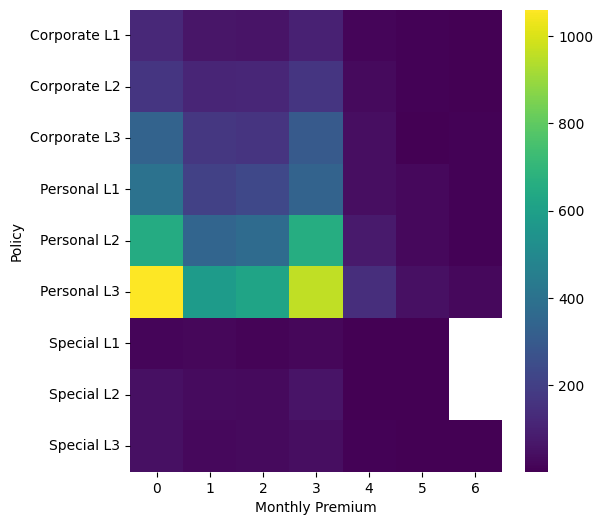

In [78]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy'].value_counts()
    for x_label, grp in df_new.groupby('Monthly Premium Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly Premium')
_ = plt.ylabel('Policy')

C:\Users\HP\AppData\Local\Temp\ipykernel_18472\3987771172.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for x_label, grp in df_new.groupby('Monthly Premium Category')


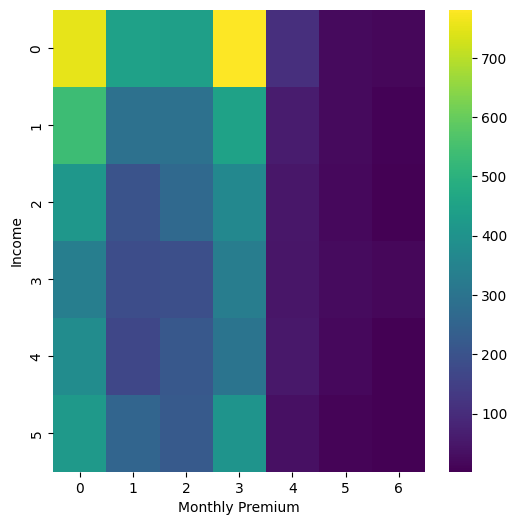

In [79]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Income Category'].value_counts()
    for x_label, grp in df_new.groupby('Monthly Premium Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly Premium')
_ = plt.ylabel('Income')

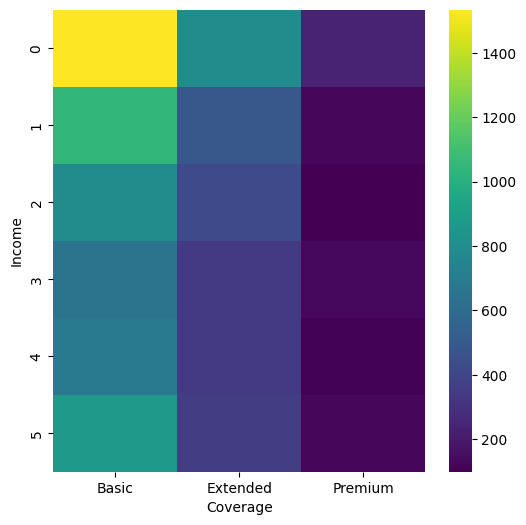

In [80]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Income Category'].value_counts()
    for x_label, grp in df_new.groupby('Coverage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coverage')
_ = plt.ylabel('Income')

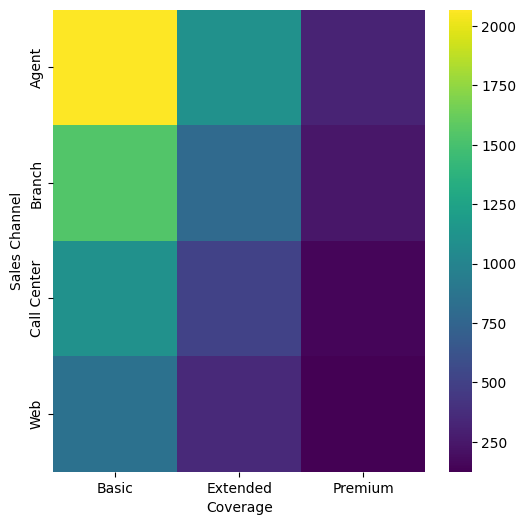

In [81]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Sales Channel'].value_counts()
    for x_label, grp in df_new.groupby('Coverage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coverage')
_ = plt.ylabel('Sales Channel')

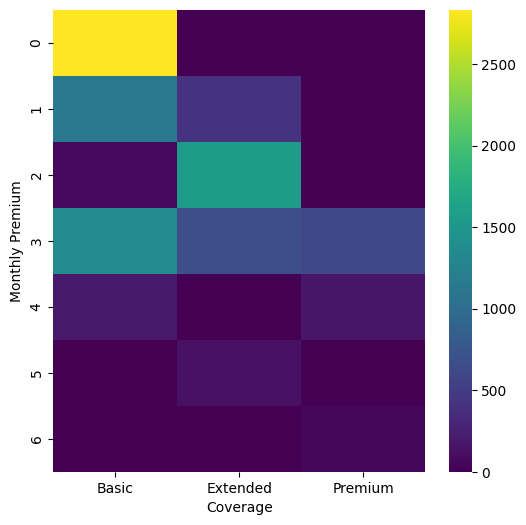

In [82]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Monthly Premium Category'].value_counts()
    for x_label, grp in df_new.groupby('Coverage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coverage')
_ = plt.ylabel('Monthly Premium')

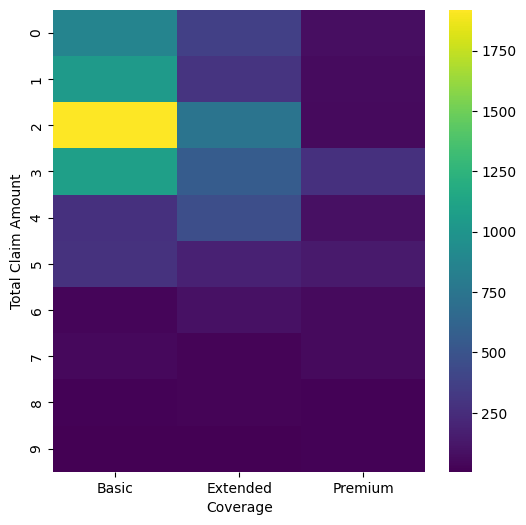

In [83]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Total Claim Amount Category'].value_counts()
    for x_label, grp in df_new.groupby('Coverage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coverage')

_ = plt.ylabel('Total Claim Amount')

### Dimensionality Reduction

#### 1) Principal Component Analysis
Finding the appropriate number of components for PCA using Elbow Method

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [85]:
numerical_columns = ['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
           'Months Since Policy Inception', 'Number of Open Complaints',
           'Number of Policies', 'Total Claim Amount']

In [86]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])
pca = PCA()
pca.fit(df_scaled)

PCA()

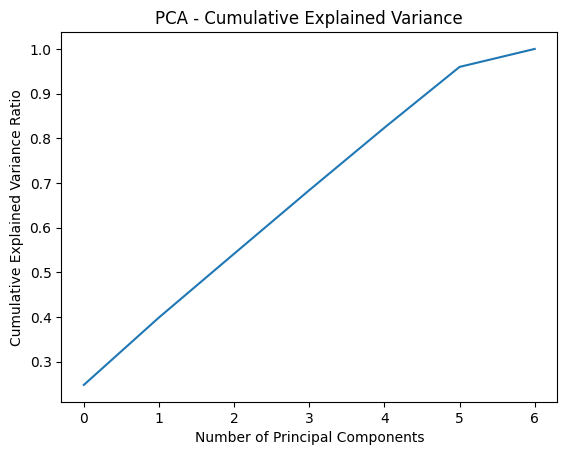

In [87]:
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance')
plt.show()

We will consider the number of components = 3 for the PCA of the numerical features.


In [88]:
# Initialize PCA
pca = PCA(n_components=5)

# Fit PCA to the standardized data
pca.fit(df_scaled)

# Transform the data into the new feature space
df_pca = pca.transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Display the DataFrame with principal components
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5
0 -0.743364  1.654475 -0.294265 -1.784279  0.276085
1  2.128287  0.990163 -0.821634  2.017952 -0.053372
2  0.468835  0.065729 -0.308743 -0.734216  0.420762
3  0.917910  0.612331 -0.686405  1.708054 -0.468162
4 -1.141628 -0.372408 -0.329233 -0.712626 -0.324881


Plotting the 3 Principal Components on a 3D plot

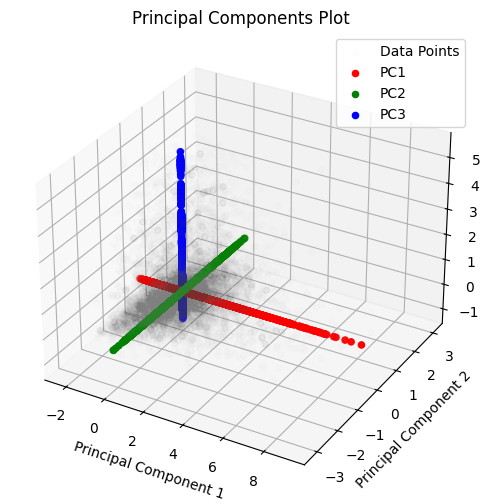

In [89]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
PC1 = df_pca['PC1']
PC2 = df_pca['PC2']
PC3 = df_pca['PC3']
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='gray', label='Data Points', marker='o', alpha = 0.01)
ax.scatter(PC1, np.zeros_like(PC1), np.zeros_like(PC1), c='r', label='PC1', marker='o')
ax.scatter(np.zeros_like(PC2), PC2, np.zeros_like(PC2), c='g', label='PC2', marker='o')
ax.scatter(np.zeros_like(PC3), np.zeros_like(PC3), PC3, c='b', label='PC3', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Principal Components Plot')
ax.legend()
plt.show()

#### 2) t-distributed Stochastic Neighbor Embedding

In [90]:
df_2 = pd.concat([df[numerical_columns], df_categorical_new], axis = 1)
df_2.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,Coverage,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,56274,69,32,5,0,1,384.811147,Washington,No,Basic,...,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,0,94,13,42,0,8,1131.464935,Arizona,No,Extended,...,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,48767,108,18,38,0,2,566.472247,Nevada,No,Premium,...,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,0,106,18,65,0,7,529.881344,California,No,Basic,...,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,43836,73,12,44,0,1,138.130879,Washington,No,Basic,...,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [91]:
cat = df_categorical_new.columns.to_list()

In [92]:
cat

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [93]:
df_encode = pd.get_dummies(df_2, columns=cat)
df_encode.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,56274,69,32,5,0,1,384.811147,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,94,13,42,0,8,1131.464935,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,48767,108,18,38,0,2,566.472247,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,0,106,18,65,0,7,529.881344,False,True,False,...,False,False,False,False,True,False,False,False,True,False
4,43836,73,12,44,0,1,138.130879,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [94]:
df_scaled_new = scaler.fit_transform(df_encode)
len(df_scaled_new[0,])

64

In [95]:
from sklearn.manifold import TSNE

In [96]:
tsne = TSNE(n_components=3, random_state=42)
df_tsne = tsne.fit_transform(df_scaled_new)

In [99]:
df_tsne

array([[ -8.376602 , -19.368221 ,  19.992817 ],
       [  6.14256  ,   3.4944031, -25.322708 ],
       [ -3.5437224,  -7.6710453,   1.6693808],
       ...,
       [-31.460703 ,   1.786919 ,  12.31115  ],
       [  2.0960448,  -3.722295 ,  -9.160446 ],
       [-20.89936  , -21.013233 ,   9.629082 ]], dtype=float32)

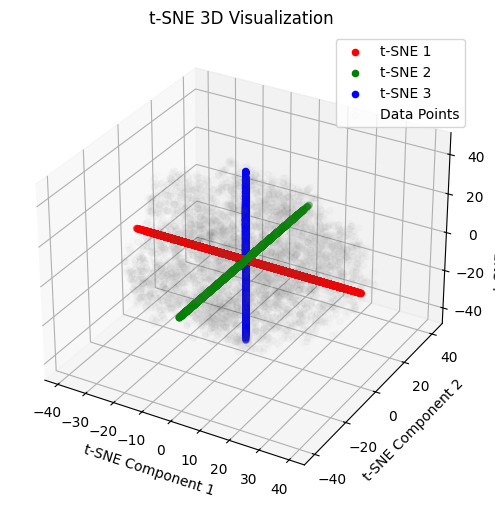

In [100]:
# Visualize the results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
tsne1 = df_tsne[:, 0]
tsne2 = df_tsne[:, 1]
tsne3 = df_tsne[:, 2]
ax.scatter(tsne1, np.zeros_like(tsne1), np.zeros_like(tsne1), c='r', label='t-SNE 1', marker='o')
ax.scatter(np.zeros_like(tsne2), tsne2, np.zeros_like(tsne2), c='g', label='t-SNE 2', marker='o')
ax.scatter(np.zeros_like(tsne3), np.zeros_like(tsne3), tsne3, c='b', label='t-SNE 3', marker='o')
ax.scatter(tsne1, tsne2, tsne3, alpha=0.01, label='Data Points',c = 'gray')
ax.set_title('t-SNE 3D Visualization')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.legend()
plt.show()

### Clustering Analysis
### K-Means Clustering to find Customer Segmentation
We have the scaled and encoded dataset df_scaled_new to use for clustering.

Also, we have the number of clusters to be considered from the Elbow Method graph to be 3.

In [101]:
from sklearn.cluster import KMeans

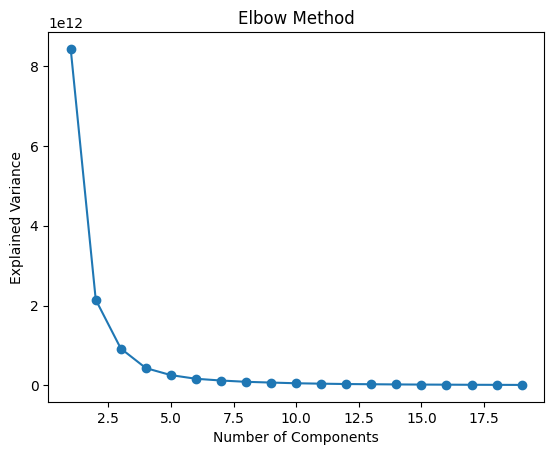

In [102]:
exp_variance = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init = 'auto')
    kmeans.fit(df_encode)
    exp_variance.append(kmeans.inertia_)

plt.plot(range(1, 20), exp_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Method')
plt.show()

In [103]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init = 'auto')
clusters = kmeans.fit_predict(df_scaled_new)

In [104]:
df['Cluster'] = clusters
cluster_centers = kmeans.cluster_centers_

In [105]:
clusters

array([3, 0, 3, ..., 0, 3, 0])

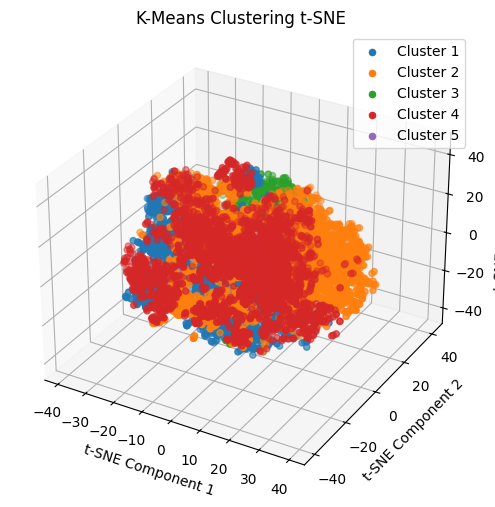

In [106]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(5):
    ax.scatter(df_tsne[clusters == cluster, 0],
               df_tsne[clusters == cluster, 1],
               df_tsne[clusters == cluster, 2],
               label=f'Cluster {cluster+1}')

ax.set_title('K-Means Clustering t-SNE')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.legend()
plt.show()

In [107]:
df_pca_new = np.array(df_pca)

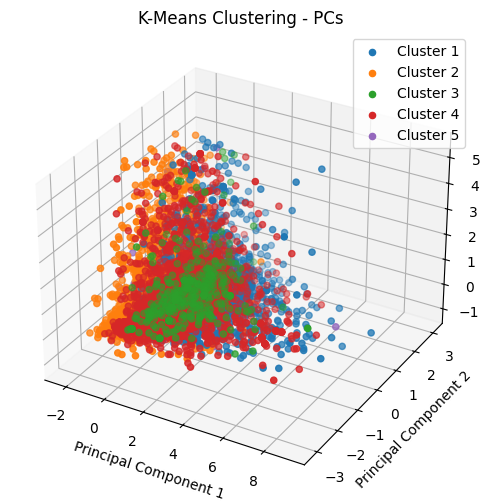

In [108]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(5):
    ax.scatter(df_pca_new[clusters == cluster, 0],
               df_pca_new[clusters == cluster, 1],
               df_pca_new[clusters == cluster, 2],
               label=f'Cluster {cluster+1}')

ax.set_title('K-Means Clustering - PCs')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

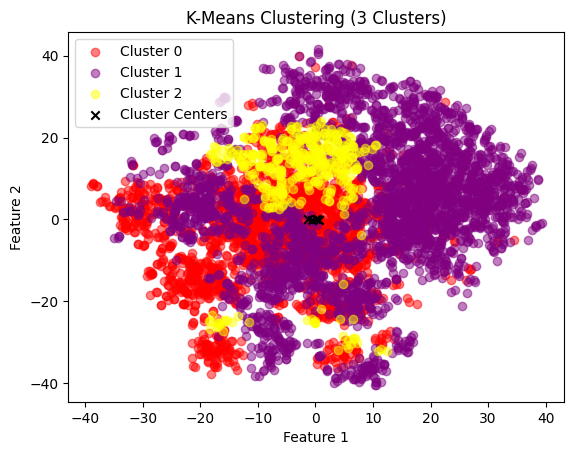

In [109]:
# Scatter plot for cluster 0
plt.scatter(df_tsne[clusters == 0, 0], df_tsne[clusters == 0, 1], c='red', label='Cluster 0', alpha=0.5)

# Scatter plot for cluster 1
plt.scatter(df_tsne[clusters == 1, 0], df_tsne[clusters  == 1, 1], c='purple', label='Cluster 1', alpha=0.5)

# Scatter plot for cluster 2
plt.scatter(df_tsne[clusters  == 2, 0], df_tsne[clusters  == 2, 1], c='yellow', label='Cluster 2', alpha=0.5)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', label='Cluster Centers')

plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Customer Segmentation

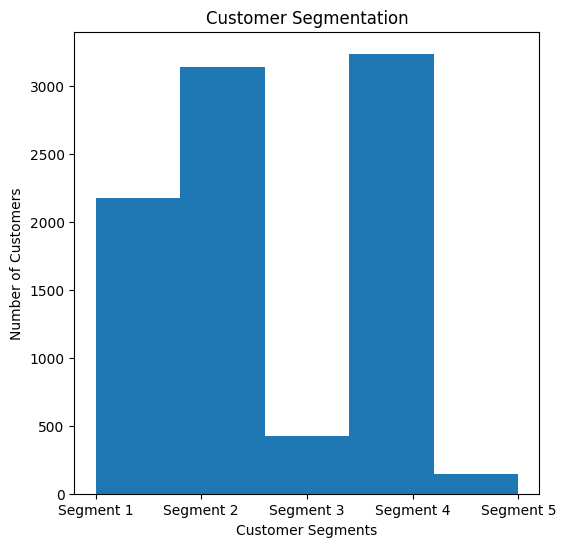

In [116]:
plt.figure(figsize = (6,6))
labels = ["Segment 1", "Segment 2", "Segment 3","Segment 4", "Segment 5"]
plt.hist(df['Cluster'], bins = 5, label = labels)
#bins = 3
plt.xticks(ticks = [0,1,2,3,4],labels = labels)
plt.title("Customer Segmentation")
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.show()

Evaluating K-Means Clustering

In [112]:
from sklearn.metrics import silhouette_score

In [113]:

sil_score = silhouette_score(df_tsne, kmeans.labels_)
print("Silhouette Score:", sil_score)

Silhouette Score: -0.059295293


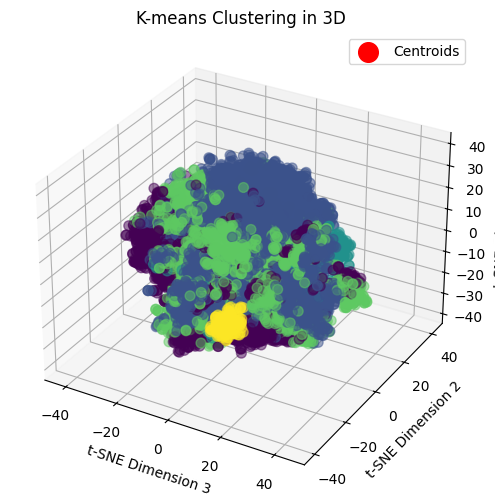

In [114]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(df_tsne[:, 2], df_tsne[:, 1], df_tsne[:, 0], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)

# Plot cluster centroids
ax.scatter( cluster_centers[:, 2], cluster_centers[:, 1], cluster_centers[:, 0], c='red', marker='o', s=200, label='Centroids', alpha = 1)

ax.set_xlabel('t-SNE Dimension 3')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 1')
ax.set_title('K-means Clustering in 3D')
plt.legend()
plt.show()

### Feature Importance Analysis